In [52]:
import torch
# from Define_Model.ResNet import LocalResNet
# from Define_Model.Loss.SoftmaxLoss import AdditiveMarginLinear
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
# import Process_Data.constants as c
import pickle
import matplotlib

%matplotlib inline

In [2]:
grad_dir = '/Users/yang/PycharmProjects/SpeakerVerification-pytorch/Data/Data/gradient'
x = np.arange(161) * 8000 / (161 - 1)
y = np.arange(81) * 8000 / 80
z = np.arange(21) * 8000 / 20

In [34]:
relu_mean6 = np.load(grad_dir + '/ThinResNet34/vox1/klsp_egs_rvec_mean/acc_grad/123456/relu_mean/train.grad.npy')
relu_mean7 = np.load(grad_dir + '/ThinResNet34/vox1/klsp_egs_rvec_mean/acc_grad/123457/relu_mean/train.grad.npy')
relu_mean8 = np.load(grad_dir + '/ThinResNet34/vox1/klsp_egs_rvec_mean/acc_grad/123458/relu_mean/train.grad.npy')

relu_mean_input_thin34 = []
for seed in [123456, 123457, 123458]:
    relu_mean_input_thin34.append(np.load(grad_dir + '/ThinResNet34/vox1/klsp_egs_rvec_mean/acc_input/%d/relu_mean/train.grad.npy'%seed))

print(len(relu_mean_input_thin34))
relu_mean_input_thin10 = []

for seed in [123456, 123457, 123458]:
    relu_mean_input_thin10.append(np.load(grad_dir + '/ThinResNet10/vox1/klsp_egs_rvec_mean/acc_input/%d/relu_mean/train.grad.npy'%seed))
print(len(relu_mean_input_thin10))


3
3


In [62]:
relu_mean_input_thin34_v2 = []
for seed in [123456]:
    relu_mean_input_thin34_v2.append(np.load(grad_dir + '/ThinResNet34/vox2/arcsoft_sgd_rop/acc_input/%d/relu_mean/train.grad.npy'%seed))

relu_mean_input_thin34_v2_w = []
for seed in [123456]:
    relu_mean_input_thin34_v2_w.append(np.load(grad_dir + '/ThinResNet34/vox2/arcsoft_sgd_rop/acc_input/%d/relu_mean_lw/train.grad.npy'%seed))

aishell2_relu_mean_input_thin34 = []
for seed in [123456]:
    aishell2_relu_mean_input_thin34.append(np.load(grad_dir + '/ThinResNet34/aishell2/klsp_egs_baseline/acc_input/%d/relu_mean_lw/train.grad.npy'%seed))



In [ ]:
plt.figure(figsize=(12, 6))
plt.rc('font', family='Times New Roman')
plt.xlabel('Frequency (Hz)', fontsize=24)
plt.xticks(fontsize=22)
plt.ylabel('Weight', fontsize=24)
plt.yticks(fontsize=22)


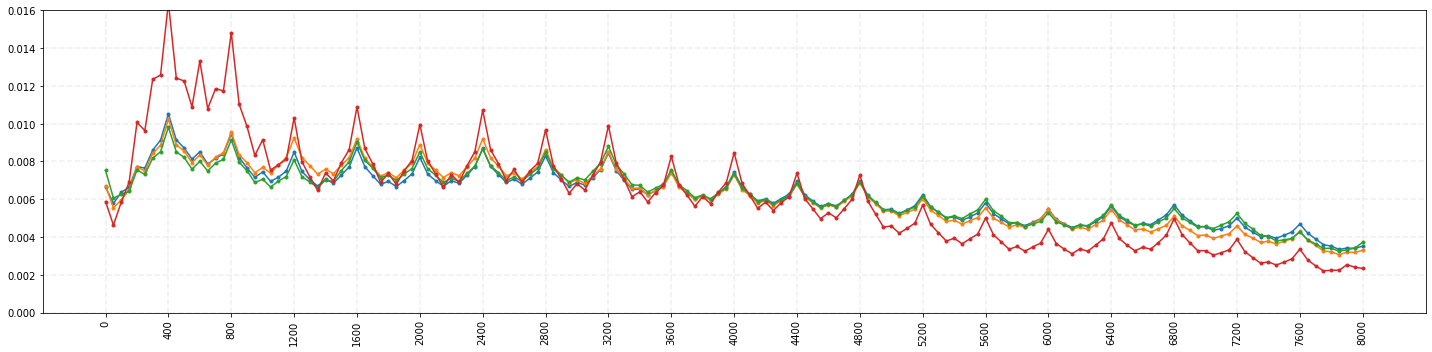

In [13]:
plt.figure(figsize=(20, 5))
plt.plot(x, relu_mean6/relu_mean6.sum(), marker='.')
plt.plot(x, relu_mean7/relu_mean7.sum(), marker='.')
plt.plot(x, relu_mean8/relu_mean8.sum(), marker='.')
plt.plot(x, relu_mean6_var/relu_mean6_var.sum(), marker='.')
plt.plot(x, relu_mean6_input/relu_mean6_input.sum(), marker='.')

plt.xticks(z, rotation=90)
plt.ylim(0.000, 0.016)

plt.grid(linestyle='--', axis='both', alpha=0.2, linewidth=1.5)
plt.tight_layout()
plt.show()

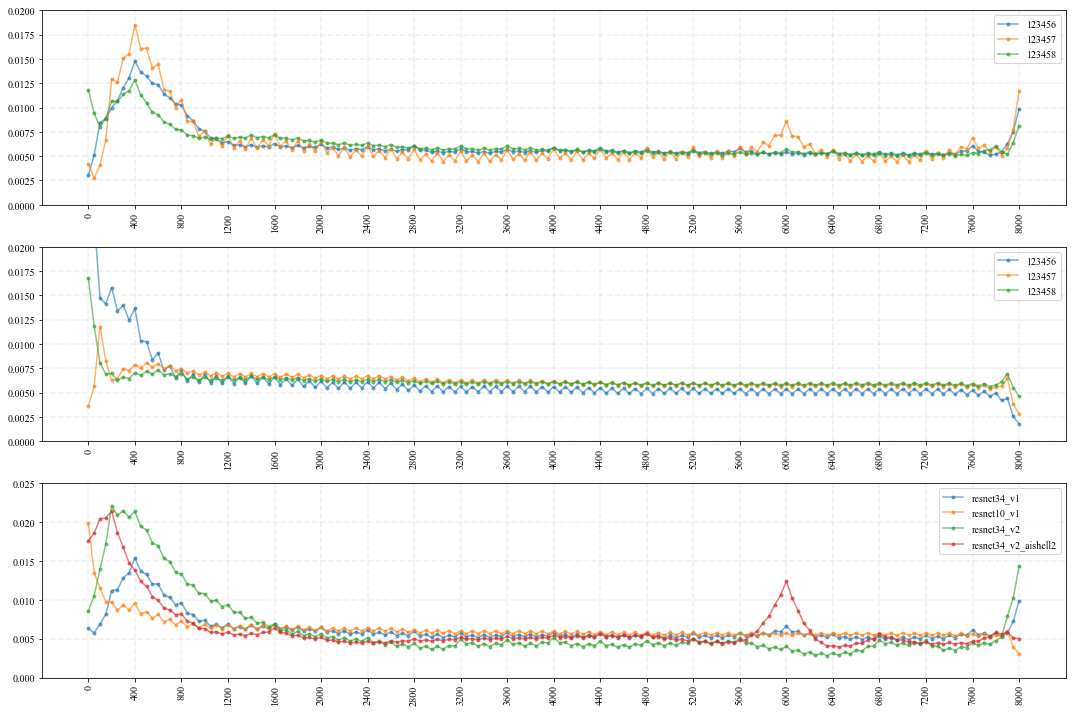

In [63]:
plt.figure(figsize=(15, 10))
plt.subplot(3,1,1)
alpha=0.6
for w in relu_mean_input_thin34:
    plt.plot(x, w/w.sum(), marker='.', alpha=alpha)
plt.legend(['123456', '123457', '123458']) 

plt.xticks(z, rotation=90)
plt.grid(linestyle='--', axis='both', alpha=0.2, linewidth=1.5)
plt.ylim(0.000, 0.02)

plt.tight_layout() 

plt.subplot(3,1,2)
for w in relu_mean_input_thin10:
    plt.plot(x, w/w.sum(), marker='.', alpha=alpha)
plt.legend(['123456', '123457', '123458']) 

plt.xticks(z, rotation=90)
plt.ylim(0.000, 0.02)

plt.grid(linestyle='--', axis='both', alpha=0.2, linewidth=1.5)
plt.tight_layout()

plt.subplot(3,1,3)
for w in [relu_mean_input_thin34, relu_mean_input_thin10, relu_mean_input_thin34_v2, aishell2_relu_mean_input_thin34]:
    w = np.mean(w, axis=0)
    plt.plot(x, w/w.sum(), marker='.', alpha=alpha)
plt.legend(['resnet34_v1', 'resnet10_v1', 'resnet34_v2', 'resnet34_v2_aishell2']) 
plt.xticks(z, rotation=90)
plt.ylim(0.000, 0.025)

plt.grid(linestyle='--', axis='both', alpha=0.2, linewidth=1.5)
plt.tight_layout()
plt.show()

In [6]:
with open(grad_dir + '/ThinResNet34/vox1/klsp_egs_rvec_mean/acc_grad/123456/relu_mean/freq.data.pickle', 'rb') as f:
    relu_mean6_freq_data = pickle.load(f)
    
relu_mean6_var = relu_mean6_freq_data['train.time.var']

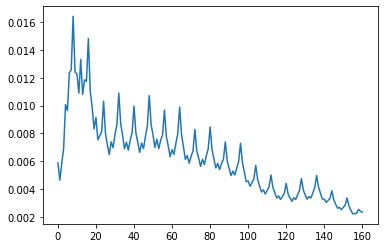

In [8]:
plt.plot(relu_mean6_var/relu_mean6_var.sum())

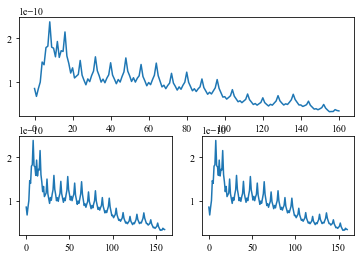

In [55]:
plt.rc('font', family='Times New Roman')

plt.subplot(2,1,1)
plt.plot(relu_mean6_var)

plt.subplot(2,2,3)
plt.plot(relu_mean6_var)
plt.subplot(2,2,4)
plt.plot(relu_mean6_var)



In [54]:
fnames = [f.name for f in matplotlib.font_manager.fontManager.ttflist]

print(fnames)

['ITC Bookman', 'Palatino', 'Symbol', 'Helvetica', 'New Century Schoolbook', 'Helvetica', 'Times', 'Helvetica', 'Courier', 'Utopia', 'Courier', 'Courier', 'Utopia', 'Courier', 'Helvetica', 'Courier', 'Computer Modern', 'Helvetica', 'New Century Schoolbook', 'Times', 'New Century Schoolbook', 'Helvetica', 'Times', 'Helvetica', 'Utopia', 'Helvetica', 'Helvetica', 'ITC Avant Garde Gothic', 'Times', 'ITC Zapf Chancery', 'Palatino', 'Symbol', 'Computer Modern', 'Times', 'ITC Bookman', 'ITC Bookman', 'Computer Modern', 'Helvetica', 'Helvetica', 'ITC Bookman', 'Computer Modern', 'Courier', 'Computer Modern', 'Helvetica', 'Times', 'ITC Avant Garde Gothic', 'Helvetica', 'Palatino', 'New Century Schoolbook', 'Palatino', 'Courier', 'Times', 'ZapfDingbats', 'Times', 'Helvetica', 'ITC Zapf Dingbats', 'ITC Avant Garde Gothic', 'ITC Avant Garde Gothic', 'Utopia', 'Courier']


In [ ]:
matplotlib.font_manager.fontManager.addfont('/home/yangwenhao/Times-New-Roman.ttf')